# Reconnaissance faciale via CNN (réseau de neurones à convolution)
## Partie 2: Reconnaissance faciale en temps réel

## Librairies

In [1]:
import pickle
import numpy as np

import cv2

import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

## Algorithme

### Chargement des images

Pour un CNN on a beasoin des images du dataset en couleurs. Pour convertir les images en couleurs on utilise la fonction `cv2.cvtColor(visage, cv2.COLOR_BGR2RGB)`.

Shape of visages matrix -->  (30, 50, 50, 3)


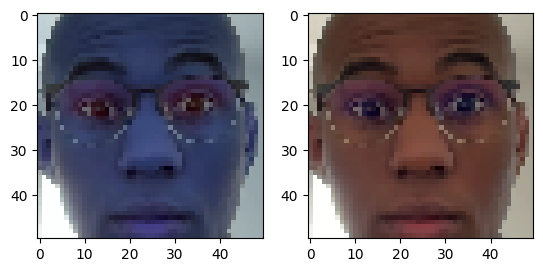

In [13]:
LEN_IMG = 3
with open('data/visages.pkl', 'rb') as fh:
    visages = pickle.load(fh)

sample_1 = visages[LEN_IMG]

visages_color = []
for visage in visages:
    img_rgb = cv2.cvtColor(visage, cv2.COLOR_BGR2RGB)
    visages_color.append(img_rgb)
visages = np.array(visages_color)

sample_2 = visages[LEN_IMG]

with open('data/noms.pkl', 'rb') as fh:
    noms = pickle.load(fh)

print('Shape of visages matrix --> ', visages.shape)

fig, ax = plt.subplots(1,2)
ax[0].imshow(sample_1)
ax[1].imshow(sample_2)

In [4]:
N = len(noms)
visages = visages.reshape(N, 50, 50, 3)

# Normaliser les valeurs des pixels entre 0 et 1
visages = visages / 255.0

# Convertir les noms en entiers
nom_to_int = {nom: i for i, nom in enumerate(set(noms))}
noms_entiers = [nom_to_int[nom] for nom in noms]

# Créer un modèle CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(set(noms)), activation='softmax'))  # Nombre de classes = Nombre de noms

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(visages, np.array(noms_entiers), epochs=10, validation_split=0.2)






Epoch 1/10


3/3 [==============================] - 2s 154ms/step - loss: 0.6754 - accuracy: 0.6250 - val_loss: 0.4305 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 0s 42ms/step - loss: 0.5221 - accuracy: 0.8472 - val_loss: 0.3890 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 41ms/step - loss: 0.3999 - accuracy: 0.9028 - val_loss: 0.0949 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 38ms/step - loss: 0.3399 - accuracy: 0.8889 - val_loss: 0.0956 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 41ms/step - loss: 0.2051 - accuracy: 0.9028 - val_loss: 0.5602 - val_accuracy: 0.9444
Epoch 6/10
3/3 [==============================] - 0s 39ms/step - loss: 0.2215 - accuracy: 0.9167 - val_loss: 0.0672 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 41ms/step - loss: 0.1799 - accuracy: 0.9444 - val_loss: 0.1591 - val_accuracy: 1.0000
Epoch 8/10
3/3 [=====

## Exécution

In [7]:
cascade_visage = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, trame = cap.read()
    if ret == True:
        
        # Convertir l'image en niveaux de gris pour la détection de visages
        gris = cv2.cvtColor(trame, cv2.COLOR_BGR2GRAY)
        coordonnees_visage = cascade_visage.detectMultiScale(gris, 1.3, 5)

        for (x, y, l, h) in coordonnees_visage:

            visage = trame[y:y + h, x:x + l, :]
            visage_redimensionne = cv2.resize(visage, (50, 50))
            
            # Normaliser les valeurs des pixels entre 0 et 1
            normalized_frame = visage_redimensionne / 255.0
            
            input_frame = np.expand_dims(normalized_frame, axis=0)

            predicted_probs = model.predict(input_frame)
            predicted_name = noms[np.argmax(predicted_probs)]
            
            cv2.putText(trame, predicted_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
            cv2.rectangle(trame, (x, y), (x + l, y + h), (0, 0, 255), 2)

        cv2.imshow('Reconnaissance faciale en temps réel', trame)
        
        if cv2.waitKey(1) == 27:
            break
            
    else:
        
        print("Erreur lors de la capture de la trame")
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 30ms/step


KeyboardInterrupt: 

**Exemple d'exécution du système...**

<img src="moi.png" width="400" height="auto" />

In [8]:
cap.release()
cv2.destroyAllWindows()